In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear regression

In [539]:
# Function to calculate regression line (slope and intercept)
def linearRegress(x, y):
    """
    Calculate the slope and intercept of the regression line using the least squares method.
    Also returns the Mean Squared Error
    
    Parameters:
        x (array-like): Independent variable values.
        y (array-like): Dependent variable values.
        
    Returns:
        slope (float): Slope of the regression line.
        intercept (float): Intercept of the regression line.
    """
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    # Calculate slope (m)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    slope = numerator / denominator
    
    # Calculate intercept (b)
    intercept = mean_y - slope * mean_x
    
    # Predicted values and Mean Squared Error (MSE)
    y_pred = intercept + slope * x
    mse = np.mean((y - y_pred)**2)
    
    return y_pred, slope, intercept, mse

In [523]:
ice_cream_data = {
    'Sales': [41, 23, 29, 76, 113, 79, 67, 52, 91, 58],
    'Temp': [20, 15, 13, 28, 31, 22, 26, 27, 34, 16]
}

ice_cream_df = pd.DataFrame(ice_cream_data)
ice_cream_df

,Sales,Temp
0,41,20
1,23,15
2,29,13
3,76,28
4,113,31
5,79,22
6,67,26
7,52,27
8,91,34
9,58,16


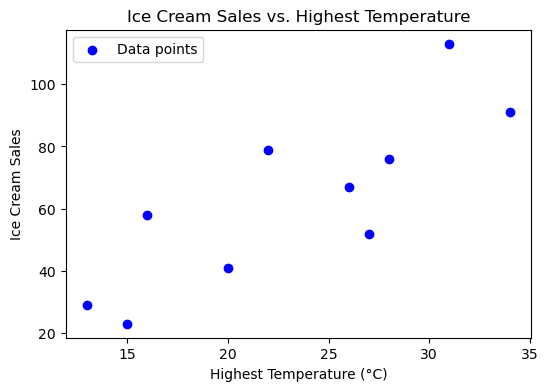

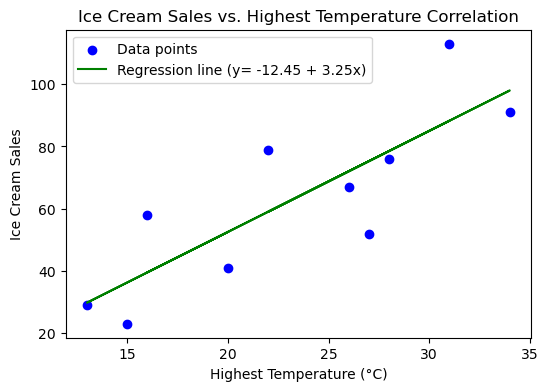

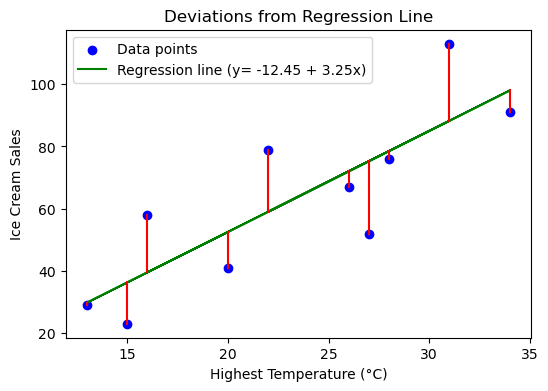

Mean Squared Error is: 228.40
Variance of the Dependent Variable is: 711.09


In [524]:
x = ice_cream_df['Temp']
y = ice_cream_df['Sales']

# Calculate variance
variance = np.mean((y - np.mean(y))**2)
# Calculate the regression line
y_pred, slope, intercept, mse = linearRegress(x, y)

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Highest Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs. Highest Temperature')
plt.legend()
plt.show()

# Plot the data and a regression line
ax.plot(x, y_pred, color='green', label=f'Regression line (y= {intercept:.2f} + {slope:.2f}x)')
ax.set_title('Ice Cream Sales vs. Highest Temperature Correlation')
ax.legend()
display(fig)

# Show lines for deviations from the regresion line
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='red')  # Vertical lines for deviations
ax.set_title('Deviations from Regression Line')
ax.legend()
display(fig)

print(f"Mean Squared Error is: {mse:.2f}")
print(f"Variance of the Dependent Variable is: {variance:.2f}")

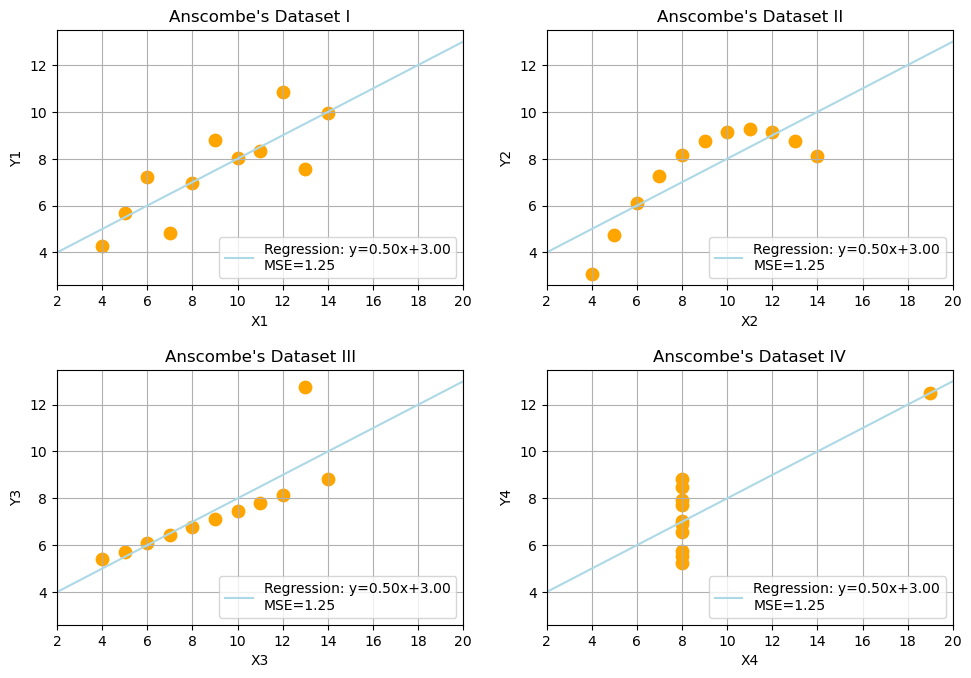

In [525]:
# Anscombe's quartet
anscombes = {
    "I": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    "II": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    "III": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    "IV": {
        'x': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
ax = ax.flatten()

# Plot all datasets
for i, (key, data) in enumerate(anscombes.items()):
    df = pd.DataFrame(data)
    x = np.array(df['x'])
    y = np.array(df['y'])
    
    # Scatter plot
    ax[i].scatter(x, y, color='orange', s=80)
    
    # Calculate regression line
    _, slope, intercept, mse = linearRegress(x, y)

    ax[i].set_xlim(2, 20) 
    x_min, x_max = ax[i].get_xlim()
    y_min = slope * x_min + intercept
    y_max = slope * x_max + intercept
    
    # Plot regression line
    ax[i].plot([x_min, x_max], [y_min, y_max], color='lightblue', label=f'Regression: y={slope:.2f}x+{intercept:.2f}\nMSE={mse:.2f}')

    # Formatting
    ax[i].set_title(f"Anscombe's Dataset {key}")
    ax[i].set_xlabel(f"X{i+1}")
    ax[i].set_ylabel(f"Y{i+1}")
    ax[i].legend(loc="lower right")
    ax[i].grid(True)

    # Force tick labels
    ax[i].tick_params(axis='x', which='both', labelbottom=True)
    ax[i].tick_params(axis='y', which='both', labelleft=True)

# Adjust layout and display
plt.tight_layout(pad=1.5)
plt.show()

## Linear regression with gradient descent

In [527]:
def normalize(x):
    """
    Normalizes the data to the range [0, 1].
    Returns: Normalized data, minimum value, and maximum value for denormalization.
    """
    min = np.min(x)
    max = np.max(x)
    normalized_x = (x - min) / (max - min)
    return normalized_x, min, max

def denormalize(normalized_x, min, max):
    """ Denormalizes the data from the range [0, 1] back to its original range."""
    return normalized_x * (max - min) + min


def phi(x):
    """
    Prepares the design matrix for linear regression.
    
    Parameters:
    x (array-like): Input data values.
    
    Returns:
    numpy.ndarray: A 2D array with a column of ones (to represent the intercept term) 
                   and the input data values.
    """
    ""
    if x.ndim == 1:  # Single feature (1D array)
        return np.vstack([np.ones(x.shape[0]), x])
    return np.vstack([np.ones((x.shape[0])), x.T]) #return np.c_[np.ones(x.shape[0]), x]


def MSE(y_pred, training_data):
    """ Computes the mean squared error (MSE). """
    return np.mean((y_pred - training_data[1]) ** 2)


def gradientMSE(y_pred, training_data):
    """ Computes the gradient of the cost function. """
    x, y = training_data
    return 2 * np.dot(phi(x), (y_pred - y)) / len(x)


def gradientDescent(F, gradientF, training_data, w, eta, epochs, clipvalue=None, clipnorm=None, results=False):
    """
    Optimizes weights using gradient descent.
    
    Parameters:
    F (function): Function to minimize.
    gradientF (function): Gradient of the function.
    training_data (tuple): A tuple (x, y), where:
        - x (array-like): Input data values.
        - y (array-like): Output data values.
    w (array-like): Initial weights.
    eta (float): Learning rate.
    epochs (int): Number of iterations.
    clipvalue (float): The threshold for clipping individual gradient values.
    clipnorm (float): The threshold for clipping the L2 norm of the gradient.
    
    Returns:
    numpy.ndarray: Optimized weights.
    """
    # Ensure that both clipping methods can't be used simultaneously
    if clipvalue is not None and clipnorm is not None:
        raise ValueError("You can only use one of 'clipvalue' or 'clipnorm'. Do not use both.")
    
    x, y = training_data
    for i in range(epochs):
        y_pred = np.dot(w, phi(x))  # Predicted values
        value = F(y_pred, training_data)  # Cost value
        gradient = gradientF(y_pred, training_data)  # Gradient

        # Gradient clipping
        if clipnorm is not None:
            # Clip the gradient based on the L2 norm
            norm = np.linalg.norm(gradient)
            if norm > clipnorm:
                gradient = gradient * (clipnorm / norm)
        elif clipvalue is not None:
            # Clip the gradient based on the individual value threshold
            gradient = np.clip(gradient, -clipvalue, clipvalue)
        
        w = w - eta * gradient  # Update weights
        
        # Print results
        if results:
            print(f"epoch {i+1}: w = {w}, F(w) = {value}, ∇F = {gradient}")
    return w


def linRegressGD(training_data, eta, epochs, clipvalue=None, clipnorm=None, results=False):
    """
    Performs linear regression using gradient descent.
    
    Parameters:
    training_data (tuple): A tuple (x, y), where:
        - x (array-like): Input data values.
        - y (array-like): Output data values.
    eta (float): Learning rate.
    epochs (int): Number of iterations.
    
    Returns:
    y_pred (numpy.ndarray): Predicted output values.
    optimized_weights (numpy.ndarray): Optimized weights.
    """
    x, y = training_data

    if x.ndim == 1:  # If it's a 1D array (single feature)
        x = x.reshape(-1, 1)
    initial_weights = np.zeros(x.shape[1] + 1)
    
    optimized_weights = gradientDescent(MSE, gradientMSE, (x, y), initial_weights, eta, epochs, clipvalue, clipnorm, results)
    y_pred = optimized_weights.dot(phi(x))
    return y_pred, optimized_weights

In [528]:
trainExamples = {
    "x": [1,2,4],
    "y": [1,3,3]
}

test_df = pd.DataFrame(trainExamples)
test_df

,x,y
0,1,1
1,2,3
2,4,3


epoch 1: w = [0.46666667 1.26666667], F(w) = 6.333333333333333, ∇F = [ -4.66666667 -12.66666667]
epoch 2: w = [0.24888889 0.54222222], F(w) = 2.3185185185185184, ∇F = [2.17777778 7.24444444]
epoch 3: w = [0.41274074 0.93362963], F(w) = 1.0534650205761318, ∇F = [-1.63851852 -3.91407407]
epoch 4: w = [0.36116543 0.70060247], F(w) = 0.6515254138088706, ∇F = [0.51575309 2.3302716 ]
epoch 5: w = [0.42865119 0.81788181], F(w) = 0.5207664184524718, ∇F = [-0.67485761 -1.17279342]
epoch 6: w = [0.42790944 0.73947672], F(w) = 0.47544933446504895, ∇F = [0.0074175  0.78405092]
epoch 7: w = [0.46390509 0.77118491], F(w) = 0.45727370676331525, ∇F = [-0.35995643 -0.31708187]
epoch 8: w = [0.47790445 0.74170366], F(w) = 0.44792263345796063, ∇F = [-0.1399936   0.29481241]
epoch 9: w = [0.50286185 0.74696313], F(w) = 0.4416253441726497, ∇F = [-0.24957401 -0.05259462]
epoch 10: w = [0.52037335 0.73321255], F(w) = 0.43654906998929216, ∇F = [-0.17511505  0.13750572]
epoch 11: w = [0.54079949 0.73054075], F

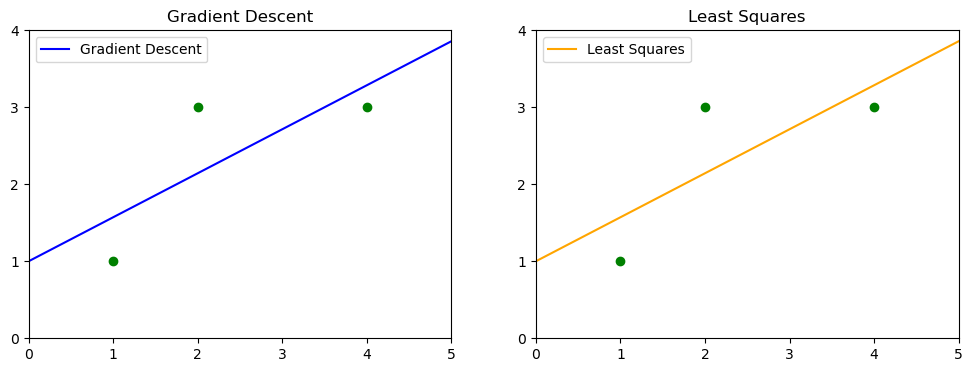

 Intercept: 0.9999999999999998, Slope: 0.5714285714285715, MSE: 0.3809523809523809


In [529]:
x = test_df['x'].to_numpy()
y = test_df['y'].to_numpy()

y_estimate, weights = linRegressGD((x,y), 0.1, 500, results=True)
y_pred, slope, intercept, mse = linearRegress(x, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for ax in axs:
    ax.scatter(x, y, color="green")
    ax.set_xlim(0, max(x)+1)
    ax.set_ylim(0, max(y)+1)
    ax.set_xticks(range(0, max(x)+2, 1))
    ax.set_yticks(range(0, max(y)+2, 1))
    x_min, x_max = ax.get_xlim()
    
y_min = weights.dot(phi(np.array([x_min])))  # Calculate y_min
y_max = weights.dot(phi(np.array([x_max])))  # Calculate y_max
axs[0].plot([x_min, x_max], [y_min, y_max], label="Gradient Descent", color="blue")
axs[0].set_title("Gradient Descent")
axs[0].legend()


y_min = slope * x_min + intercept
y_max = slope * x_max + intercept
axs[1].plot([x_min, x_max], [y_min, y_max], label="Least Squares", color="orange")
axs[1].set_title("Least Squares")
axs[1].legend()

plt.show()

print(f" Intercept: {intercept}, Slope: {slope}, MSE: {mse}")

In [557]:
def linRegress(training_data):
    """
    Perform multiple linear regression using the least squares method.
    Handles multiple features (independent variables) and uses the phi function to create the feature vector.
    
    Parameters:
        training_data (tuple): A tuple (x, y), where:
            - x (array-like): Independent variable values (features).
                              Shape should be (n_samples, n_features).
            - y (array-like): Dependent variable values (target).
                              Shape should be (n_samples,).
        
    Returns:
        y_pred (numpy.ndarray): Predicted output values.
        coefficients (numpy.ndarray): Coefficients (weights) of the regression line.
        mse (float): Mean Squared Error (MSE) of the predictions.
    """
    x, y = training_data
    
    if x.ndim == 1:  # If it's a 1D array (single feature)
        x = x.reshape(-1, 1)
        
    X = phi(x).T # Feature vector
    # coefficients = (X_design.T @ X_design)^(-1) @ X_design.T @ y
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    y_pred = np.dot(coefficients, X.T)

    mse = MSE(y_pred, training_data)

    return y_pred, coefficients, mse

In [530]:
house_data = {
    'Price': [368000, 414000, 506000, 552000, 598000, 644000, 690000, 736000, 782000, 828000],
    'Square_Meters': [139, 167, 224, 279, 325, 371, 417, 463, 508, 554],
    'Age': [10, 15, 5, 20, 15, 10, 25, 8, 12, 3]
}

housing_df = pd.DataFrame(house_data)
housing_df

,Price,Square_Meters,Age
0,368000,139,10
1,414000,167,15
2,506000,224,5
3,552000,279,20
4,598000,325,15
5,644000,371,10
6,690000,417,25
7,736000,463,8
8,782000,508,12
9,828000,554,3


epoch 1: w = [0.106      0.07312771 0.04209091], F(w) = 0.381, ∇F = [-1.06       -0.73127711 -0.42090909]
epoch 2: w = [0.17999207 0.12895429 0.07016158], F(w) = 0.22368772006624268, ∇F = [-0.7399207  -0.55826579 -0.28070667]
epoch 3: w = [0.23127825 0.17241831 0.08832789], F(w) = 0.1431349489587388, ∇F = [-0.51286179 -0.43464016 -0.18166318]
epoch 4: w = [0.26646261 0.20702778 0.09951092], F(w) = 0.1013284446336514, ∇F = [-0.35184365 -0.34609477 -0.11183031]
epoch 5: w = [0.29023371 0.23527503 0.10578343], F(w) = 0.07910367193630806, ∇F = [-0.23771093 -0.28247246 -0.06272508]
epoch 6: w = [0.30592005 0.25893116 0.10861592], F(w) = 0.06679774683912518, ∇F = [-0.15686341 -0.23656132 -0.02832488]
epoch 7: w = [0.31588456 0.27925522 0.10905131], F(w) = 0.05953761983889837, ∇F = [-0.09964507 -0.20324058 -0.00435393]
epoch 8: w = [0.32180457 0.29714264 0.10782898], F(w) = 0.054864864586443865, ∇F = [-0.0592002  -0.17887416  0.0122233 ]
epoch 9: w = [0.32487071 0.31323065 0.10547281], F(w) =

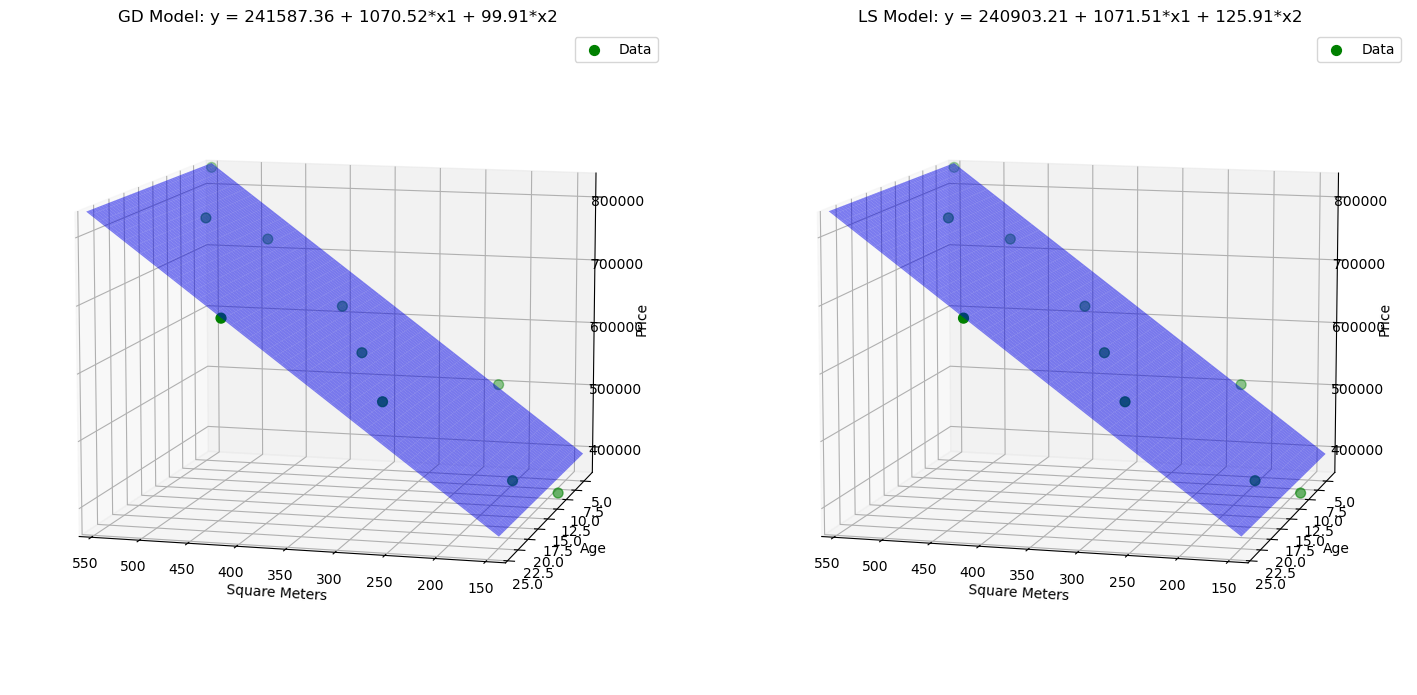

In [567]:
x1 = housing_df['Square_Meters'].to_numpy()
x2 = housing_df['Age'].to_numpy()
y = housing_df['Price'].to_numpy()

x1_norm, x1_min, x1_max = normalize(x1)
x2_norm, x2_min, x2_max = normalize(x2)

X = np.vstack([x1_norm, x2_norm]).T

y_norm, y_min, y_max = normalize(y)

# Fit model using Gradient Descent
_, weights_norm = linRegressGD((X, y_norm), 0.1, 500, results=True)
w0_gd, w1_gd, w2_gd = weights_norm
w1_gd = w1_gd / (x1_max - x1_min) * (y_max - y_min)
w2_gd = w2_gd / (x2_max - x2_min) * (y_max - y_min)
w0_gd = w0_gd * (y_max - y_min) + y_min - w1_gd * x1_min - w2_gd * x2_min

# Fit model using Least Squares
X_ls = np.vstack([x1, x2]).T
y_pred, coefficients, mse = linRegress((X_ls, y))
w0_ls, w1_ls, w2_ls = coefficients

# --- Generate mesh grid ---
x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Predictions for GD and LS models
y_pred_mesh_gd = w0_gd + w1_gd * x1_mesh + w2_gd * x2_mesh
y_pred_mesh_ls = w0_ls + w1_ls * x1_mesh + w2_ls * x2_mesh

# --- Create the figure and axes ---
fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': '3d'})

# --- Shared plot settings ---
for ax in axs:
    ax.scatter(x1, x2, y, color='green', label='Data', s=50)
    ax.set_xlabel('Square Meters')
    ax.set_ylabel('Age')
    ax.set_zlabel('Price')
    ax.view_init(azim=105, elev=10)  # Shared view angle
    ax.set_xlim([x1_min, x1_max])
    ax.set_ylim([x2_min, x2_max])
    ax.set_zlim([min(y), max(y)])

# --- Plot Gradient Descent model ---
axs[0].plot_surface(x1_mesh, x2_mesh, y_pred_mesh_gd, color='blue', alpha=0.5)
axs[0].set_title(f'GD Model: y = {w0_gd:.2f} + {w1_gd:.2f}*x1 + {w2_gd:.2f}*x2')
axs[0].legend()

# --- Plot Least Squares model ---
axs[1].plot_surface(x1_mesh, x2_mesh, y_pred_mesh_ls, color='blue', alpha=0.5)
axs[1].set_title(f'LS Model: y = {w0_ls:.2f} + {w1_ls:.2f}*x1 + {w2_ls:.2f}*x2')
axs[1].legend()

# --- Show the plots ---
plt.tight_layout()
plt.show()

In [532]:
"""housing_data = {
    "Size(m2)": [45, 55, 60, 72, 85, 90, 95, 100, 107, 110, 115, 125, 130, 135, 145, 
                155, 160, 165, 175, 185, 190, 200, 215, 225, 230, 240, 250, 265, 
                270, 280, 290, 300, 310, 320, 330, 340, 350, 360],
    "Price(€)": [115000, 130000, 125000, 180000, 185000, 200000, 192500, 210000, 
                    245000, 235000, 250000, 265000, 275000, 290000, 330000, 315000, 
                    340000, 350000, 400000, 410000, 420000, 450000, 500000, 520000, 
                    535000, 550000, 590000, 620000, 640000, 650000, 670000, 700000, 
                    710000, 740000, 750000, 780000, 800000, 850000]
}"""


house_df = pd.read_csv('housing_prices.csv', sep=';')
house_df.head(5)
# Size ($1000)  Price (Square Feet)

,Size,Price
0,848,179
1,998,169
2,1098,249
3,1199,299
4,1236,201


Epoch_value: 50, Learning_rate: 0.01
epoch 1: w = [0.00642811 0.00290439], F(w) = 0.15804915084109958, ∇F = [-0.64281109 -0.29043904]
epoch 2: w = [0.01270924 0.00575943], F(w) = 0.15312794995232104, ∇F = [-0.62811247 -0.28550426]
epoch 3: w = [0.01884663 0.00856621], F(w) = 0.14841960138360297, ∇F = [-0.61373912 -0.28067728]
epoch 4: w = [0.02484347 0.01132576], F(w) = 0.14391480435083265, ∇F = [-0.59968387 -0.27595573]
epoch 5: w = [0.03070286 0.01403914], F(w) = 0.13960466463869786, ∇F = [-0.58593967 -0.27133727]
epoch 6: w = [0.03642786 0.01670733], F(w) = 0.13548067682791104, ∇F = [-0.57249965 -0.26681962]
epoch 7: w = [0.04202143 0.01933134], F(w) = 0.13153470729935376, ∇F = [-0.55935708 -0.26240056]
epoch 8: w = [0.04748648 0.02191212], F(w) = 0.12775897798118022, ∇F = [-0.54650541 -0.25807792]
epoch 9: w = [0.05282587 0.02445061], F(w) = 0.12414605080640041, ∇F = [-0.53393818 -0.25384955]
epoch 10: w = [0.05804236 0.02694775], F(w) = 0.120688812849887, ∇F = [-0.52164912 -0.2497

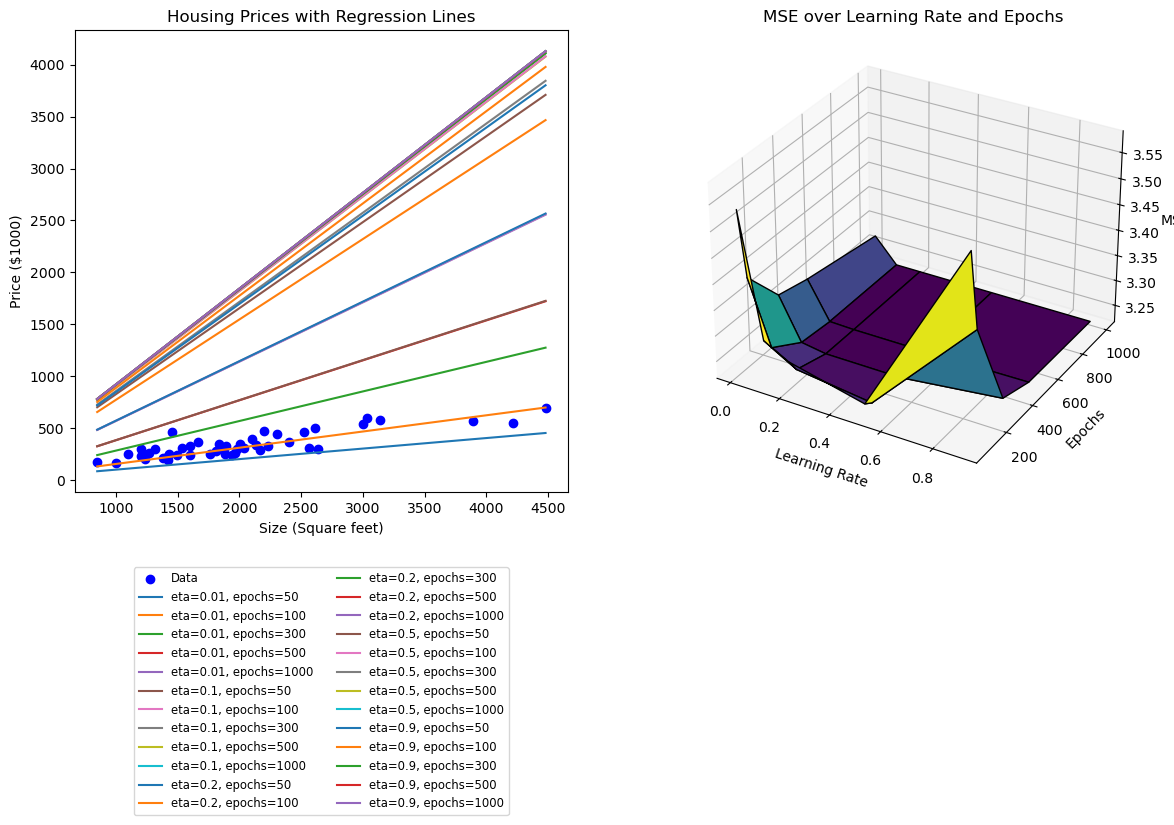

In [533]:
from mpl_toolkits.mplot3d import Axes3D

size = house_df["Size"].to_numpy()
price = house_df["Price"].to_numpy()

size_normalized, x_min, x_max = normalize(size)
price_normalized, y_min, y_max = normalize(price)

training_data = (size_normalized, price_normalized)

learning_rates = [0.01, 0.1, 0.2, 0.5, 0.9]
epoch_list = [50, 100, 300, 500, 1000]

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121) # 1-row 2-column 1-index (from left)
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(size, price, color='blue', label='Data')
ax1.set_title('Housing Prices with Regression Lines')
ax1.set_xlabel('Size (Square feet)')
ax1.set_ylabel('Price ($1000)')

# Arrays to hold values for 3D plot
mse_vals = [] # Mean Squared Error
lr_vals = [] # Learning rate
epoch_vals = []

# Perform gradient descent for each combination of learning rate and epoch
for eta in learning_rates:
    for epochs in epoch_list:
        print(f"Epoch_value: {epochs}, Learning_rate: {eta}")
        y_pred_normalized, optimized_weights = linRegressGD(training_data, eta, epochs, results=True)
        # Denormalize predictions
        y_pred = denormalize(y_pred_normalized, y_min, y_max)
        mse = np.mean((y_pred - size) ** 2)
        mse_vals.append(mse)
        lr_vals.append(eta)
        epoch_vals.append(epochs)
        # Plot regression line  (range for size to ensure the line spans the plot)
        size_range = np.linspace(min(size), max(size), 100)
        y_pred_line = optimized_weights[0] + optimized_weights[1] * size_range
        ax1.plot(size_range, y_pred_line, label=f'eta={eta}, epochs={epochs}')

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')


mse_vals = np.array(mse_vals)
lr_vals = np.array(lr_vals)
epoch_vals = np.array(epoch_vals)

# Reshape mse_values for 3D plot
mse_vals = mse_vals.reshape(len(learning_rates), len(epoch_list))
lr_vals = lr_vals.reshape(len(learning_rates), len(epoch_list))
epoch_vals = epoch_vals.reshape(len(learning_rates), len(epoch_list))


ax2.plot_surface(lr_vals, epoch_vals, mse_vals, cmap='viridis', edgecolor="k")
ax2.set_title('MSE over Learning Rate and Epochs')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Epochs')
ax2.set_zlabel('MSE')

plt.show()

epoch 1: w = [0.06428111 0.0290439 ], F(w) = 0.15804915084109958, ∇F = [-0.64281109 -0.29043904]
epoch 2: w = [0.1138636  0.05315303], F(w) = 0.11373390210827374, ∇F = [-0.49582489 -0.24109123]
epoch 3: w = [0.15200023 0.07340541], F(w) = 0.0866396566526182, ∇F = [-0.3813663  -0.20252379]
epoch 4: w = [0.18122482 0.09064092], F(w) = 0.06999891088834607, ∇F = [-0.29224595 -0.17235517]
epoch 5: w = [0.20351116 0.10551394], F(w) = 0.0597049431381205, ∇F = [-0.22286342 -0.14873021]
epoch 6: w = [0.22039677 0.11853432], F(w) = 0.053265651161054736, ∇F = [-0.16885604 -0.13020372]
epoch 7: w = [0.23307931 0.13009931], F(w) = 0.04916871873349965, ∇F = [-0.12682537 -0.11564991]
epoch 8: w = [0.24249171 0.14051849], F(w) = 0.046496385355007705, ∇F = [-0.09412405 -0.10419182]
epoch 9: w = [0.24936069 0.15003312], F(w) = 0.04469168038336888, ∇F = [-0.06868983 -0.09514627]
epoch 10: w = [0.25425232 0.15883122], F(w) = 0.04341656897277004, ∇F = [-0.04891627 -0.08798108]
epoch 11: w = [0.25760751 0.1

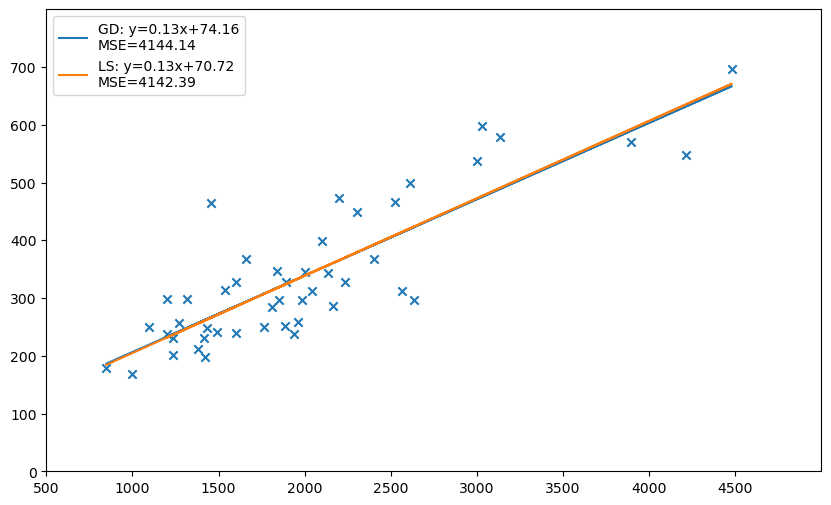

In [565]:
_, ax = plt.subplots(figsize=(10,6))

plt.scatter(house_df["Size"], house_df["Price"], marker='x')

ax.set_xlim(500, 5000)
ax.set_ylim(0, 800)
ax.set_xticks(range(500, 5000, 500))
ax.set_yticks(range(0, 800, 100))

# Normalize both input and output data
x_normalized, x_min, x_max = normalize(house_df["Size"].to_numpy())
y_normalized, y_min, y_max = normalize(house_df["Price"].to_numpy())

y_pred_normalized, optimized_weights = linRegressGD(
    (x_normalized, y_normalized), 
    eta=0.1, 
    epochs=500, 
    clipnorm=10.0, 
    results=True
)
# Denormalize predictions
y_pred = denormalize(y_pred_normalized, y_min, y_max)

# Denormalize weigths
weights = np.copy(optimized_weights)[::-1] # Reverse order
weights[0] *= (y_max - y_min) / (x_max - x_min)
weights[1] = weights[1] * (y_max - y_min) + y_min - weights[0] * x_min

mse = MSE(y_pred, (house_df["Size"], house_df["Price"])) #np.mean((y_pred - size) ** 2)
plt.plot(house_df["Size"], y_pred, label=f'GD: y={weights[0]:.2f}x+{weights[1]:.2f}\nMSE={mse:.2f}')

y_pred, slope, intercept, mse = linearRegress(house_df["Size"], house_df["Price"])
plt.plot(house_df["Size"], y_pred, label=f'LS: y={slope:.2f}x+{intercept:.2f}\nMSE={mse:.2f}')

plt.legend()
plt.show()

## Logistic regression

In [ ]:
def sigmoid(z):
    # Clip the values of z to avoid overflow/underflow
    #z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def binaryLogLoss(z, training_data):
    x, y = training_data
    y_pred = sigmoid(z) # Predicted probabilities
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradBinaryLogLoss(z, training_data):
    x, y = training_data
    y_pred = sigmoid(z)
    return np.dot(phi(x), (y_pred - y)) / len(x)
    

def logRegress(training_data, eta, epochs, threshold=0.5, clipvalue=None, clipnorm=None, results=False):
    """
    Logistic Regression model using gradient descent for optimization

    Returns:
    np.ndarray
        Binary class predictions (0 or 1) for the training data based on the logistic regression model.
    """
    x, y = training_data

    if x.ndim == 1:  # If it's a 1D array (single feature)
        x = x.reshape(-1, 1)
    initial_weights = np.zeros(x.shape[1] + 1)
     
    optimized_weights = gradientDescent(binaryLogLoss, gradBinaryLogLoss, (x, y), initial_weights, eta, epochs, clipvalue, clipnorm, results)
    z = optimized_weights.dot(phi(x))
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities

In [ ]:
study_data = {
    'Hours Studied (hrs)': [1.0, 1.7, 2.3, 2.9, 3.4, 3.8, 4.2, 4.9, 5.3, 5.8, 
                            6.2, 6.7, 7.1, 7.6, 8.3, 8.9, 9.5, 10.3, 11.1],
    'Pass/Fail (0/1)': [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 
                        0, 1, 1, 0, 1, 1, 1, 1, 1]
}

study_df = pd.DataFrame(study_data)
study_df.head(6)

In [ ]:
hours = study_df.iloc[:,0].to_numpy()
results = study_df.iloc[:,1].to_numpy()

predictions, probabilities = logRegress((hours, results), 0.4, 500, clipnorm=2, results=True)
# Plot the data points, color them based on predictions (1 -> blue, 0 -> red)
plt.scatter(hours[predictions == 1], results[predictions == 1], color="blue", label="Predicted: 1")
plt.scatter(hours[predictions == 0], results[predictions == 0], color="red", label="Predicted: 0")
# Plot the regression line
plt.plot(hours, probabilities, label="Regression line", color="purple")
# Add a grey dashed line to show the threshold (0.5)
plt.axhline(y=0.5, color='grey', linestyle='--', label="Threshold")

plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail")
plt.title("Logistic Regression")
plt.legend(loc="lower left", bbox_to_anchor=(1, 0.4))
plt.show()

print(f"Predictions:\n{predictions}\nProbabilities:\n{probabilities}")